# D82-1
* **請比較使用不同層數以及不同 Dropout rate 對訓練的效果**
* **將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果**

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

/home/rex/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout

"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
Dropout_EXP = [0.15, 0.2, 0.25, 0.3]

In [11]:
results = {}
for drop_ratio in Dropout_EXP:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.6f" % (drop_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio = drop_ratio)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    drp_name_tag = "exp-drp-%s" % str(drop_ratio)
    results[drp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0729 21:43:57.290779 140404211115776 deprecation_wrapper.py:119] From /home/rex/anaconda3/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 21:43:57.402250 140404211115776 deprecation.py:323] From /home/rex/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Experiment with Dropout = 0.150000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128) 

50000/50000 [==============================] - 7s 135us/step - loss: 1.2930 - acc: 0.5340 - val_loss: 1.3385 - val_acc: 0.5287
Epoch 50/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.2955 - acc: 0.5343 - val_loss: 1.3462 - val_acc: 0.5259
Experiment with Dropout = 0.200000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256

50000/50000 [==============================] - 7s 137us/step - loss: 1.4033 - acc: 0.4955 - val_loss: 1.3852 - val_acc: 0.5072
Epoch 48/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.3987 - acc: 0.4977 - val_loss: 1.4008 - val_acc: 0.4971
Epoch 49/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.4014 - acc: 0.4981 - val_loss: 1.3920 - val_acc: 0.5036
Epoch 50/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.3938 - acc: 0.4987 - val_loss: 1.3858 - val_acc: 0.5079
Experiment with Dropout = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)      

50000/50000 [==============================] - 7s 147us/step - loss: 1.5197 - acc: 0.4521 - val_loss: 1.4927 - val_acc: 0.4625
Epoch 46/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.5197 - acc: 0.4511 - val_loss: 1.4818 - val_acc: 0.4766
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5204 - acc: 0.4543 - val_loss: 1.4651 - val_acc: 0.4829
Epoch 48/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.5173 - acc: 0.4518 - val_loss: 1.4919 - val_acc: 0.4708
Epoch 49/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5035 - acc: 0.4586 - val_loss: 1.4884 - val_acc: 0.4712
Epoch 50/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.5122 - acc: 0.4573 - val_loss: 1.4733 - val_acc: 0.4801
Experiment with Dropout = 0.300000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (In

50000/50000 [==============================] - 7s 145us/step - loss: 1.5960 - acc: 0.4279 - val_loss: 1.5261 - val_acc: 0.4604
Epoch 44/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5959 - acc: 0.4273 - val_loss: 1.5687 - val_acc: 0.4502
Epoch 45/50
50000/50000 [==============================] - 8s 157us/step - loss: 1.5915 - acc: 0.4313 - val_loss: 1.5327 - val_acc: 0.4616
Epoch 46/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.6015 - acc: 0.4249 - val_loss: 1.5617 - val_acc: 0.4554
Epoch 47/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5957 - acc: 0.4251 - val_loss: 1.5501 - val_acc: 0.4614
Epoch 48/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.5821 - acc: 0.4319 - val_loss: 1.5408 - val_acc: 0.4554
Epoch 49/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5805 - acc: 0.4348 - val_loss: 1.5322 - val_acc: 0.4661
Epoch 50/50
50000/50000 [==============

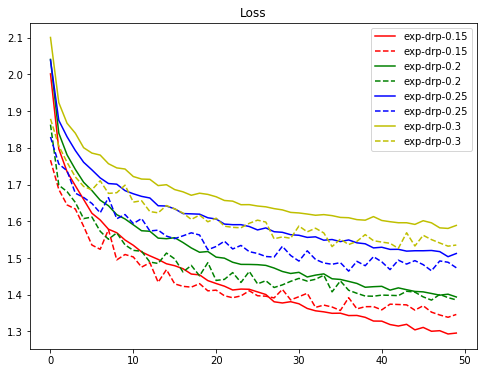

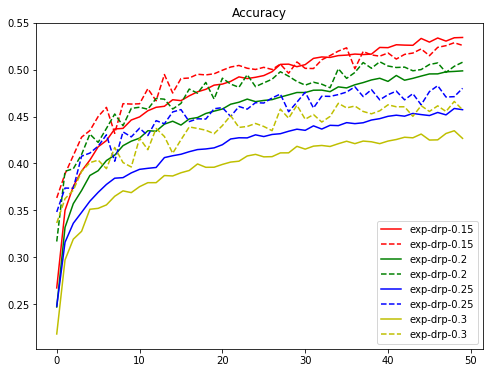

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()